## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [4]:
import pandas as pd

### Задание 1 (0.0 балла)

In [60]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')
print('The first 5 lines: ', '\n', data.head(5), '\n', 'The last 5 lines: ', '\n', data.tail(5), '\n', 'Table size: ', data.shape)

The first 5 lines:  
                 status  duration  ... foreign_worker credit_risk
0  no checking account        18  ...             no        good
1  no checking account         9  ...             no        good
2           ... < 0 DM        12  ...             no        good
3  no checking account        12  ...            yes        good
4  no checking account        12  ...            yes        good

[5 rows x 21 columns] 
 The last 5 lines:  
                                          status  ...  credit_risk
995                         no checking account  ...          bad
996                         no checking account  ...          bad
997  ... >= 200 DM / salary for at least 1 year  ...          bad
998                                  ... < 0 DM  ...          bad
999                         no checking account  ...          bad

[5 rows x 21 columns] 
 Table size:  (1000, 21)


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [6]:
data.isna().sum() #тест показал, что пропусков нет

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [7]:
# Проверим, есть ли неявные пропуски в таблице
print(*[data[col].value_counts() for col in list(data)], sep='\n'*2+'='*20+'\n'*2) # ставим раздилитель для более легкого чтения данных

... >= 200 DM / salary for at least 1 year    394
no checking account                           274
... < 0 DM                                    269
0<= ... < 200 DM                               63
Name: status, dtype: int64


24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
27     13
60     13
42     11
11      9
20      8
8       7
4       6
45      5
39      5
7       5
14      4
13      4
28      3
33      3
54      2
22      2
16      2
5       1
47      1
26      1
72      1
40      1
Name: duration, dtype: int64


no credits taken/all credits paid back duly    530
all credits at this bank paid back duly        293
existing credits paid back duly till now        88
critical account/other credits elsewhere        49
delay in paying off in the past                 40
Name: credit_history, dtype: int64


furniture/equipment    280
others                 234
car (used)             181
car (new)              103
retraining

Пропусков в данных нет, обнаруженные 'unknown' это часть данных в столбцах 'savings' и 'propetry'.

In [ ]:
# Разделим данные на категориальные, количественные, бинарные и порядковые
categorical = data[['status', 'credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing',
               'job', 'savings']]
quantitative = data[['duration', 'age']]
binary = data[['telephone', 'foreign_worker', 'credit_risk']]
ordinal = data[['employment_duration', 'installment_rate', 'present_residence', 'number_credits', 'people_liable']]

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [16]:
data.groupby(['purpose']).agg({'amount': 'mean'})

,amount
purpose,
business,8209.333333
car (new),5370.223301
car (used),3066.983425
domestic appliances,2728.090909
furniture/equipment,2487.685714
others,3062.948718
radio/television,1498.000000
repairs,3180.400000
retraining,4158.041237


### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [77]:
res1 = len(data[(data['age'] < 30)&(data['housing'] == 'rent')])/len(data[(data['age'] < 30)])*100
res1 = round(res1, 2)
res2 = (len(data[(data['age'] > 40)&(data['housing'] == 'rent')])/len(data[(data['age'] < 30)]))*100
res2 = round(res2, 2)
print('Percentage of clients under 30 years of age rents housing: ', res1, '%')
print('Percentage of clients over 40 years of age rents housing: ', res2, '%')

Percentage of clients under 30 years of age rents housing:  66.67 %
Percentage of clients over 40 years of age rents housing:  50.14 %


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [21]:
print('How many foreigners have more than 3 credits: ', 
      len(data[(data['foreign_worker'] == 'yes')&((data['number_credits'] == '4-5')|(data['number_credits'] == '>=6'))]))

How many foreigners have more than 3 credits:  1


### Задание 6 (1 балл)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

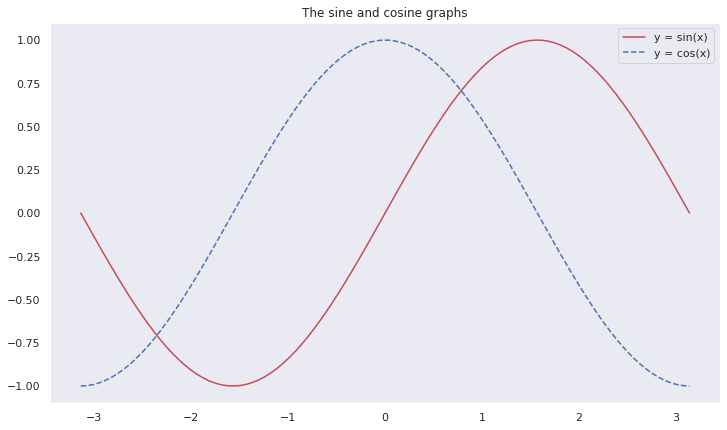

In [71]:
y1 = lambda x: np.sin(x)
y2 = lambda x: np.cos(x)
fig = plt.subplots()
plt.title('The sine and cosine graphs')
x = np.linspace(-np.pi, np.pi, 100)
plt.plot(x, y1(x), color='r', label = 'y = sin(x)')
plt.plot(x, y2(x), color='b', linestyle = 'dashed', label = 'y = cos(x)')
plt.grid()
plt.legend(loc='best')
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

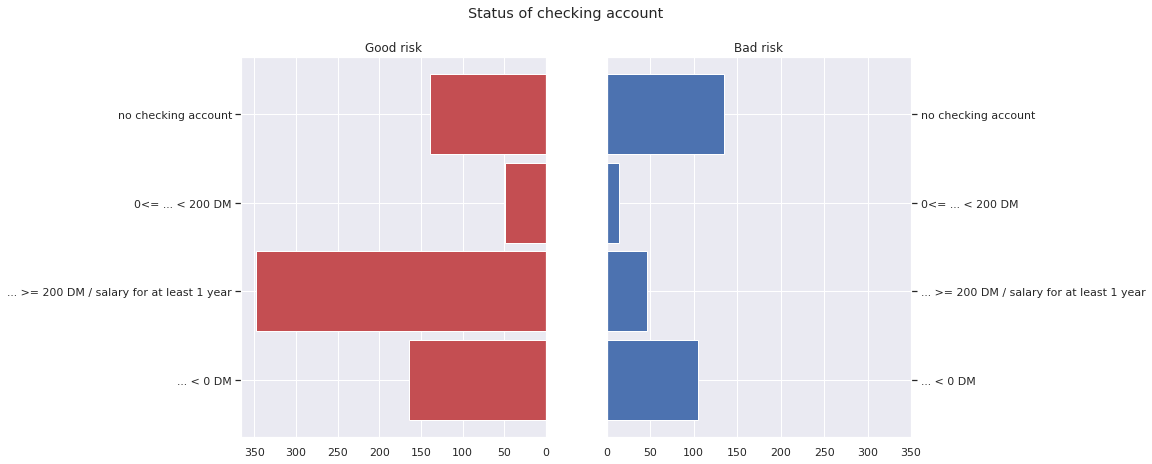

In [33]:
#кредит риск в зависимости от размера текущего счета
x0 = data['status'].sort_values().unique()
y1 = data.groupby('status')['credit_risk'].apply(lambda x: (x=='good').sum())
y2 = data.groupby('status')['credit_risk'].apply(lambda x: (x=='bad').sum())
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.barh(x0,y1,0.9, facecolor='r')
ax1.yaxis.tick_left()
ax2.barh(x0,y2,0.9,facecolor='b')
ax2.yaxis.tick_right()
ax2.set_xlim(0, 350)
ax1.invert_xaxis()
ax1.set_title('Good risk')
ax2.set_title('Bad risk')
fig.suptitle('Status of checking account')
plt.show()

### Задание 8  (0.5 балла)

In [11]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

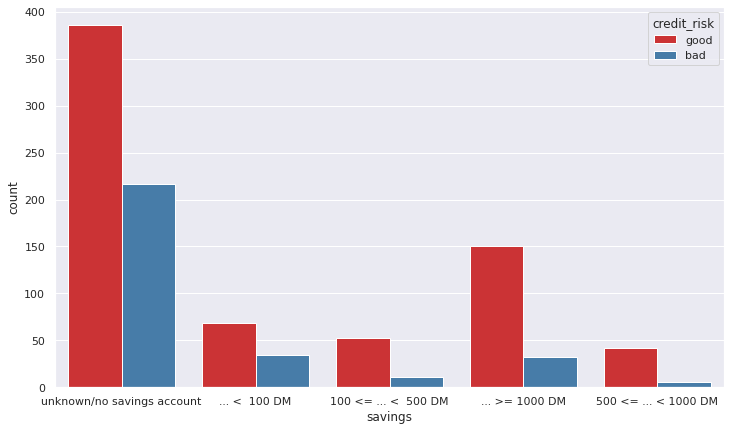

In [26]:
import seaborn as sns
sns.countplot(x ='savings',  hue = 'credit_risk', data = data, palette='Set1')
sns.set(rc={'figure.figsize':(12,7)})

С точки зрения написания кода менее трудоемкий способ для меня - через seaborn, поскольку большую часть зарактеристик графика можно прописать в основной функции. С точки зрения восприятия полученного результата, на мой взгляд, зеркальные горизонтальные диаграммы более информативны.

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

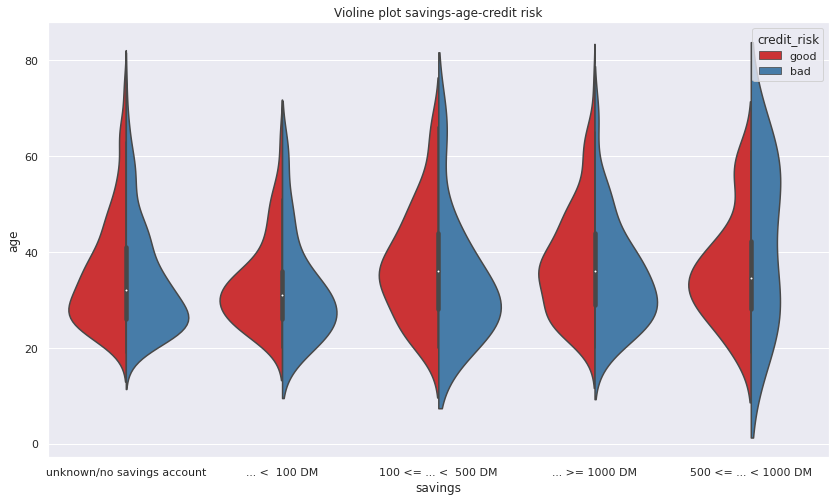

In [36]:
plt.figure(figsize=(14, 8))
plt.title('Violine plot savings-age-credit risk')
sns.violinplot(x='savings', y='age', hue='credit_risk', data=data, hue_order=['good', 'bad'], palette='Set1', split=True)

Средние у уровней признака 'status' примерно равны (визуально). Минимальный разброс.

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


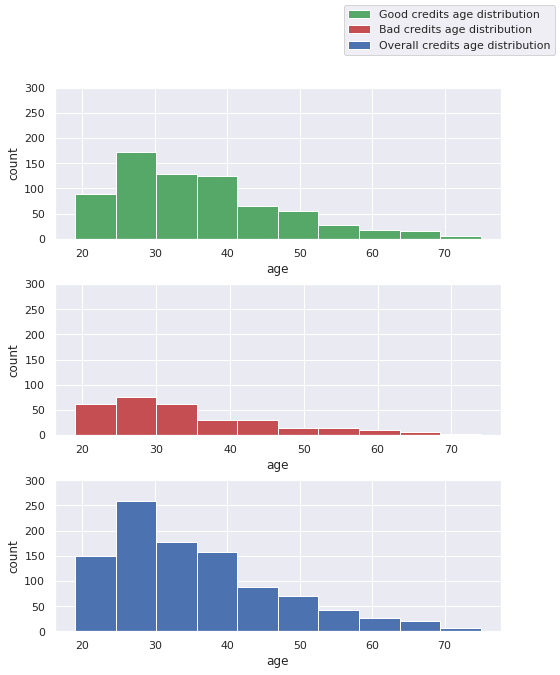

In [84]:
fig = plt.figure(figsize=(8, 10))
axs = fig.subplots(nrows = 3)
plt.subplots_adjust(hspace = 0.3)
sns.distplot(data[data['credit_risk']=='good']['age'], bins=10, kde=False, color = 'g', ax=axs[0], label='Good credits age distribution', hist_kws=dict(alpha=1))
sns.distplot(data[data['credit_risk']=='bad']['age'], bins=10, kde=False, color = 'r', ax=axs[1], label='Bad credits age distribution', hist_kws=dict(alpha=1))
sns.distplot(data['age'], bins=10, kde=False, color = 'b', ax=axs[2], label='Overall credits age distribution', hist_kws=dict(alpha=1))
plt.setp(axs[:], ylabel='count')
axs[0].set_ylim(0, 300)
axs[1].set_ylim(0, 300)
axs[2].set_ylim(0, 300)

fig.legend()
plt.show()


Можно заметить, что люди более старшего возраста (после 55) реже обращаются за кредитами, и недоверие к ним - примерно в половине случаев, так же, как и у людей до 25 лет. У остальных возрастных групп перобладают полодительные случаи.



### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

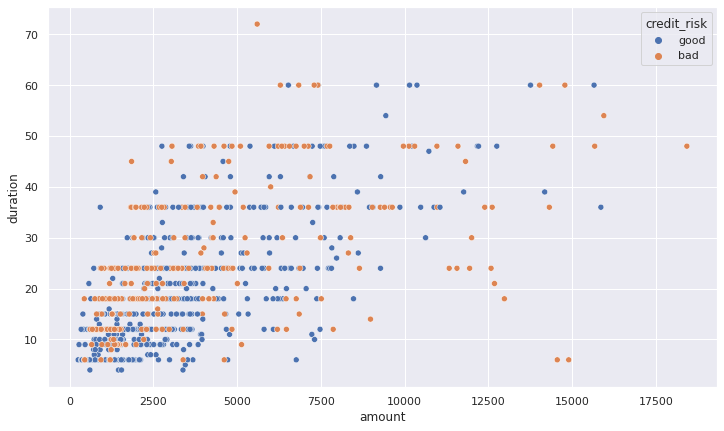

In [43]:
sns.scatterplot(data=data, x='amount', y='duration', hue = 'credit_risk')

Вывод который можно сделать по диаграмме рассеяния: чем больше срок погашения кредита, тем больше его размер.

### Задание 12  (1 балл)


Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

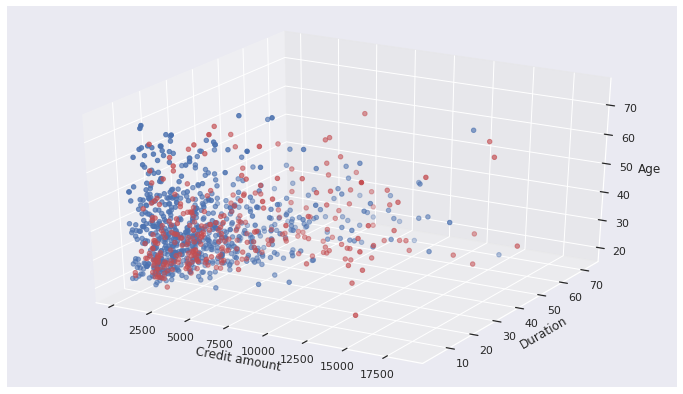

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

xG = data['amount'][data['credit_risk'] == 'good']
xB = data['amount'][data['credit_risk'] == 'bad']
yG = data['duration'][data['credit_risk'] == 'good']
yB = data['duration'][data['credit_risk'] == 'bad']
zG = data['age'][data['credit_risk'] == 'good']
zB = data['age'][data['credit_risk'] == 'bad']

ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

ax.scatter(xG, yG, zG, color = 'b')
ax.scatter(xB, yB, zB, color = 'r')

plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [66]:
# кодирование порядковых и бинарных признаков
nums = {'credit_risk': {'good': 0, 'bad':1},
        'telephone': {'yes (under customer name)': 0, 'no': 1}, 
        'foreign_worker': {'yes': 0, 'no': 1},
        'employment_duration': {'< 1 yr': 0, '1 <= ... < 4 yrs': 1, '4 <= ... < 7 yrs': 2, 'unemployed': 3, '>= 7 yrs': 4},
        'installment_rate': {'< 20': 0,'25 <= ... < 35': 1, '20 <= ... < 25': 2, '>= 35': 3},
        'present_residence': {'>= 7 yrs': 0, '1 <= ... < 4 yrs': 1, '4 <= ... < 7 yrs': 2, '< 1 yr': 3},
        'number_credits': {'1': 0, '2-3': 1, '4-5': 2, '>= 6': 3},
        'people_liable': {'0 to 2': 0, '3 or more': 1}}
data1 = data.replace(nums)
data1

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,0,0,female : non-single or male : single,none,0,car or other,21,none,for free,0,skilled employee/official,0,1,1,0
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1,1,male : married/widowed,none,1,unknown / no property,36,none,for free,1,skilled employee/official,1,1,1,0
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,2,1,female : non-single or male : single,none,0,unknown / no property,23,none,for free,0,unskilled - resident,0,1,1,0
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1,2,male : married/widowed,none,1,unknown / no property,39,none,for free,1,unskilled - resident,1,1,0,0
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1,0,male : married/widowed,none,0,car or other,38,bank,rent,1,unskilled - resident,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1,1,male : married/widowed,none,0,unknown / no property,21,none,for free,0,unskilled - resident,1,1,1,1
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,4,0,male : married/widowed,co-applicant,3,unknown / no property,45,none,rent,0,skilled employee/official,0,1,1,1
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,4,0,male : married/widowed,none,0,real estate,30,none,own,0,manager/self-empl./highly qualif. employee,0,0,1,1
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,3,1,male : married/widowed,none,3,real estate,52,none,rent,0,manager/self-empl./highly qualif. employee,0,0,1,1


In [67]:
# Все столбцы с типом данных object - категориальные, их мы будем удалять в слудющем шаге
data1.dtypes

status                     object
duration                    int64
credit_history             object
purpose                    object
amount                      int64
savings                    object
employment_duration         int64
installment_rate            int64
personal_status_sex        object
other_debtors              object
present_residence           int64
property                   object
age                         int64
other_installment_plans    object
housing                    object
number_credits              int64
job                        object
people_liable               int64
telephone                   int64
foreign_worker              int64
credit_risk                 int64
dtype: object

In [68]:
# удаление категориальных признаков из таблицы
cat_cols = [col for col in data1.columns if data1[col].dtype.name=='object']
data1 = data1.drop(cat_cols, axis=1)
data1

,duration,amount,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,18,1049,0,0,0,21,0,0,1,1,0
1,9,2799,1,1,1,36,1,1,1,1,0
2,12,841,2,1,0,23,0,0,1,1,0
3,12,2122,1,2,1,39,1,1,1,0,0
4,12,2171,1,0,0,38,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,24,1987,1,1,0,21,0,1,1,1,1
996,24,2303,4,0,3,45,0,0,1,1,1
997,21,12680,4,0,0,30,0,0,0,1,1
998,12,6468,3,1,3,52,0,0,0,1,1


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [70]:
#Для проверки были выбраны несколько критериев, при наличии некоторых из них в своеобразный score клиента добавляется 1. 
#Чем больше score _ тем боьше доверия к клиенту. По этому score высчитывается средняя. 
#Путем нескольких проб было выяснено, что если она выше значения 0.1, то credit_risk будет принимать значение 'good'. 
#Тест верен в 0.652 (проверялся так же и на тренировочной выборке, результат - не меньше 0.6).
def predict(Xtest: np.array) -> np.array:
    answers = np.array([])
    for test in Xtest:
        score = 0
        for condition in ['... >= 200 DM / salary for at least 1 year', 'all credits at this bank paid back duly', '... >= 1000 DM', '>= 7 yrs', '< 20', '< 1 yr', 'real estate', 'car or other', 'none', '1', 'manager/self-empl./highly qualif. employee', '3 or more']:
            if condition in test:
                score +=1
        if score/11>0.1:
            answers = np.append(answers, 'good')
        else:
            answers = np.append(answers, 'bad')
    return answers

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
accuracy_score(y_test, predict(X_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


0.652